<a href="https://colab.research.google.com/github/varthini-30/tasksgenai/blob/main/Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import os
import pandas as pd

path = kagglehub.dataset_download("kandij/mall-customers")

csv_path = os.path.join(path, "Mall_Customers.csv")
dt = pd.read_csv(csv_path)
dt.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
x = dt.iloc[:, [3,4]].values

In [ ]:
from sklearn.cluster import KMeans
errors = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    errors.append(kmeans.inertia_)

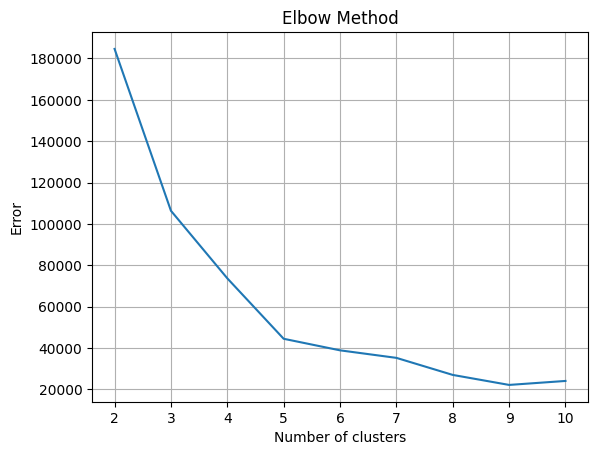

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(2,11), errors)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.grid()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(x)

KMeans(n_clusters=5)

In [ ]:
dt['group'] = kmeans.predict(x)

In [ ]:
dt.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),group
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

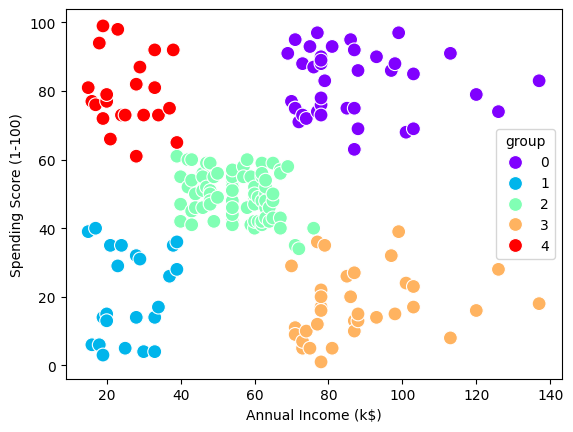

In [ ]:
import seaborn as sns
sns.scatterplot(x=dt['Annual Income (k$)'], y=dt['Spending Score (1-100)'], hue=dt['group'], palette='rainbow' , s = 100)

In [ ]:
dt[dt['group']==3]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),group
124,125,Female,23,70,29,3
128,129,Male,59,71,11,3
130,131,Male,47,71,9,3
134,135,Male,20,73,5,3
136,137,Female,44,73,7,3
138,139,Male,19,74,10,3
140,141,Female,57,75,5,3
144,145,Male,25,77,12,3
146,147,Male,48,77,36,3
148,149,Female,34,78,22,3


In [ ]:
kmeans.predict([[30,25]])

array([1], dtype=int32)

In [ ]:
print("Group:",kmeans.predict([[70,80]])[0])

Group: 0


In [ ]:
kmeans.cluster_centers_

array([[86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])